# LSTM 시계열 추론 모델 학습 및 예측 실습

- 순환 신경망(RNN, Recurrent Neural Network)의 한 종류로, 기존의 RNN이 가지고 있던 기울기 소실/폭발 문제를 해결하기 위해 등장한 모델
- 하나의 Unit에서 계산된 정보(Short Term)를 길게(Long) 전파하는 모델 
- **시계열 데이터**나 **순차적 데이터**를 처리하고 학습하기 용이
- 논문: [https://ieeexplore.ieee.org/abstract/document/6795963](https://ieeexplore.ieee.org/abstract/document/6795963)
![LSTM 구조](https://miro.medium.com/v2/resize:fit:1170/1*tvIjQjHW-1WGECloYD5efQ.png)
---



### **1. LSTM의 특징**
- **장기 의존성 학습**:
   - LSTM은 데이터를 처리할 때, 중요한 정보를 장기적으로 기억하고 불필요한 정보를 잊는 메커니즘을 가지고 있음.
   - 이를 통해 RNN이 학습하기 어려운 긴 시퀀스 데이터에서도 효과적으로 학습할 수 있음.

- **게이트 구조**:
   - LSTM은 내부적으로 **게이트(Gate)**라는 구조를 사용하여 정보를 선택적으로 저장하거나 삭제함.
   - 주요 게이트:
      1. **입력 게이트 (Input Gate)**: 새로운 정보를 얼마나 저장할지
      2. **망각 게이트 (Forget Gate)**: 이전 정보를 얼마나 잊을지
      3. **출력 게이트 (Output Gate)**: 현재 상태를 출력으로 얼마나 반영할지

- **셀 상태 (Cell State)**:
   - LSTM은 **셀 상태 ($ c_t $)**라는 추가적인 메모리 공간을 유지하여 중요한 정보를 장기적으로 저장함.
   - 셀 상태는 게이트를 통해 조절되며, 중요한 정보를 유지하거나 업데이트함.

---

### **2. LSTM의 주요 구성 요소**
1. **입력 ($ x_t $)**:
    - 현재 시점의 입력 데이터.

2. **은닉 상태 ($ h_t $)**:
    - 현재 시점에서의 출력 정보로, 단기 메모리 역할.

3. **셀 상태 ($ c_t $)**:
    - Constant Error Carousel. 장기 메모리 역할을 하며, 중요한 정보를 더 오래 유지.
    - Vanishing Gradient를 막음.
    - 연산에만 활용하며, 정보 수정이 없음.(Identity Mapping)
  
4. **게이트**:
    - 입력 게이트, 망각 게이트, 출력 게이트를 통해 정보를 선택적으로 저장, 삭제, 출력.

---

### **3. LSTM의 동작 원리**
1. **망각 게이트**:
    - 이전 셀 상태에서 잊어야 할 정보를 결정함.
    - 수식:  
       $$
       f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
       $$

2. **입력 게이트**:
    - 현재 입력에서 저장할 정보를 결정함.
    - 수식:  
       $$
       i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
       $$
    - 새로운 후보 값 계산:  
       $$
       \tilde{c}_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)
       $$

3. **셀 상태 업데이트**:
    - 이전 셀 상태와 새로운 정보를 결합하여 업데이트함.
    - 수식:  
       $$
       c_t = f_t \cdot c_{t-1} + i_t \cdot \tilde{c}_t
       $$

4. **출력 게이트**:
    - 현재 셀 상태를 기반으로 출력값을 계산함.
    - 수식:  
       $$
       o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
       $$
    - 은닉 상태 계산:  
       $$
       h_t = o_t \cdot \tanh(c_t)
       $$

---



### 4. **LSTM의 은닉 상태 (Hidden State)**
- **LSTM (Long Short-Term Memory)**: **시점별로 입력 데이터를 처리한 후, 모델이 기억하고 있는 정보의 요약**. 
- 이는 LSTM이 시계열 데이터의 **시간적 의존성**을 학습하고 유지하는 데 중요
- 은닉 상태는 단기 메모리로 작동하며, 다음 시점으로 전달되어 시계열 데이터의 패턴을 학습
- LSTM의 성능은 은닉 상태 크기(`hidden_size`)와 관련이 있으며, 적절한 크기를 선택해야 함
---

#### **1. 은닉 상태의 역할**
- 은닉 상태는 **현재 시점의 입력**과 **이전 시점의 은닉 상태**를 기반으로 계산.
- 은닉 상태는 LSTM 셀 내부에서 계산된 정보를 다음 시점으로 전달하며, **시계열 데이터의 패턴**을 학습.
- LSTM의 은닉 상태는 **단기 메모리**로 간주되며, 시점 간의 의존성을 학습하는 데 사용됨.

---

#### **2. LSTM의 주요 상태**
LSTM은 은닉 상태 외에도 다음과 같은 상태를 유지:
1. **은닉 상태 ($ h_t $)**:
   - 현재 시점에서의 출력 정보.
   - 다음 시점으로 전달되어 시계열 데이터의 의존성을 학습.

2. **셀 상태 ($ c_t $)**:
   - 장기 메모리 역할을 하며, 중요한 정보를 더 오래 유지.
   - 셀 상태는 게이트 구조(입력 게이트, 망각 게이트, 출력 게이트)를 통해 조절.

---

#### **3. 은닉 상태 계산**
은닉 상태는 다음과 같이 계산:
$$
h_t = o_t \cdot \tanh(c_t)
$$
- $ o_t $: 출력 게이트의 활성화 값.
- $ c_t $: 현재 시점의 셀 상태.
- $ \tanh $: 하이퍼볼릭 탄젠트 활성화 함수.

---

#### **4. 은닉 상태의 크기**
- 은닉 상태의 크기는 **LSTM의 `hidden_size`**로 정의.
- 예를 들어, `hidden_size=50`이면 은닉 상태는 50차원의 벡터로 표현.
- 은닉 상태의 크기가 클수록 모델이 더 많은 정보를 학습할 수 있지만, 계산 비용이 증가할 수 있음.

---


### **5. LSTM의 장점**
1. **장기 의존성 처리**:
    - RNN의 단점인 장기 의존성 문제를 해결하여 긴 시퀀스 데이터를 효과적으로 학습할 수

2. **게이트 메커니즘**:
   - 정보를 선택적으로 저장하거나 삭제하여 중요한 정보를 유지.

3. **다양한 응용 분야**:
   - 시계열 데이터 예측, 자연어 처리(NLP), 음성 인식, 주가 예측 등 다양한 분야에서 활용.

---



### **6. LSTM의 단점**
1. **복잡한 구조**:
   - RNN보다 계산량이 많고, 학습 시간이 오래 걸릴 수 있음.

2. **메모리 사용량**:
   - 많은 파라미터를 사용하므로 메모리 요구량이 큼.

3. **대규모 데이터 처리 한계**:
   - 매우 긴 시퀀스나 대규모 데이터에서는 Transformer와 같은 모델이 더 적합할 수 있음.

---



### **7. LSTM의 활용 사례**
1. **시계열 데이터**:
   - 주가 예측, 날씨 예측, 센서 데이터 분석 등.

2. **자연어 처리 (NLP)**:
   - 텍스트 생성, 번역, 감정 분석 등.

3. **음성 및 영상 처리**:
   - 음성 인식, 동영상 분석 등.

---


## 8. LSTM 학습 및 예측 예제 


## 1. 데이터 불러오기


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 다운로드 및 샘플링
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
df = pd.read_csv(url, compression='zip')[5::6]  # 10분→1시간 단위 변환
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# [참고] to_csv(): DataFrame 저장 /  read_csv(): DataFrame 불러오기
# df.iloc[:1000].to_csv('jena_sample.csv', index=False)  # 1,000행 샘플 저장

## 2. 데이터 준비

In [2]:
# 추론할 컬럼 선택
feature = 'T (degC)'

# 데이터 전처리
df = df['T (degC)'].astype('float32')
print(df.describe())


count    70091.000000
mean         9.450482
std          8.423384
min        -22.760000
25%          3.350000
50%          9.410000
75%         15.480000
max         37.279999
Name: T (degC), dtype: float64


In [3]:
# 데이터 정규화

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# [참고] MinMaxScaler: 0~1 사이로 정규화 / StandardScaler: 평균 0, 표준편차 1로 정규화 / RobustScaler: IQR을 기준으로 정규화

scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = RobustScaler(quantile_range=(5.0, 95.0))  # IQR을 기준으로 정규화
# scaler = StandardScaler()  # 평균 0, 표준편차 1로 정규화

scaled_data = scaler.fit_transform(df.values.reshape(-1, 1)) #  reshape(-1, 1)로 변환하여 1D->2D 배열로 변환
# 1D 배열을 2D 배열로 변환하는 이유: sklearn의 fit_transform() 메서드는 2D 배열을 입력으로 받기 때문
# 이때, 2D 배열의 shape는 (n_samples, n_features)여야 함

print(df.shape)
print(scaled_data.shape)
print(pd.DataFrame(scaled_data).describe())

(70091,)
(70091, 1)
                  0
count  70091.000000
mean       0.536484
std        0.140296
min        0.000000
25%        0.434877
50%        0.535809
75%        0.636909
max        1.000000


In [4]:
import numpy as np
import torch
# 시계열 데이터 생성 함수
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 시퀀스 길이 설정 및 데이터 분할
seq_length = 24  # 24시간 단위
X, y = create_sequences(scaled_data, seq_length)

# 학습/검증 데이터 분리
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# PyTorch 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).to(device)



Using device: cpu


## 3. 모델링 및 학습


In [5]:
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # 마지막 타임스텝의 출력 사용
        return out

In [6]:
# 모델 초기화
input_size = 1  # 입력 데이터의 피처 수 (단변량 시계열 데이터이므로 1)
hidden_size = 50  # LSTM의 은닉 상태 크기 (hidden state size)
output_size = 1  # 출력 데이터의 피처 수 (예측값이 단일 값이므로 1)
model = LSTMModel(input_size, hidden_size, output_size)  # LSTM 모델 초기화

In [7]:
# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()  # 손실 함수로 평균 제곱 오차(MSE) 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 사용, 학습률은 0.001로 설정

In [8]:
# 모델 학습
epochs = 10  # 학습 반복 횟수
batch_size = 32  # 배치 크기
for epoch in range(epochs):  # 에포크 반복
    model.train()  # 모델을 학습 모드로 전환
    for i in range(0, len(X_train), batch_size):  # 배치 단위로 학습 데이터 처리
        X_batch = X_train[i:i+batch_size]  # 배치 크기만큼 입력 데이터 슬라이싱
        y_batch = y_train[i:i+batch_size]  # 배치 크기만큼 타깃 데이터 슬라이싱

        # 순전파
        outputs = model(X_batch)  # 모델에 입력 데이터를 전달하여 예측값 계산
        loss = criterion(outputs, y_batch)  # 예측값과 실제값 간의 손실 계산

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()  # 이전 단계에서 계산된 그래디언트를 초기화
        loss.backward()  # 손실에 대한 그래디언트 계산 (역전파)
        optimizer.step()  # 옵티마이저를 사용하여 가중치 업데이트

    # 검증 손실 계산
    model.eval()  # 모델을 평가 모드로 전환 (드롭아웃 등 비활성화)
    with torch.no_grad():  # 검증 단계에서는 그래디언트를 계산하지 않음
        val_outputs = model(X_val)  # 검증 데이터에 대한 예측값 계산
        val_loss = criterion(val_outputs, y_val)  # 검증 데이터의 손실 계산

    # 에포크별 학습 및 검증 손실 출력
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")


Epoch 1/10, Training Loss: 0.0002, Validation Loss: 0.0013
Epoch 2/10, Training Loss: 0.0003, Validation Loss: 0.0005
Epoch 3/10, Training Loss: 0.0002, Validation Loss: 0.0003
Epoch 4/10, Training Loss: 0.0001, Validation Loss: 0.0002
Epoch 5/10, Training Loss: 0.0001, Validation Loss: 0.0002
Epoch 6/10, Training Loss: 0.0001, Validation Loss: 0.0002
Epoch 7/10, Training Loss: 0.0001, Validation Loss: 0.0002
Epoch 8/10, Training Loss: 0.0001, Validation Loss: 0.0002
Epoch 9/10, Training Loss: 0.0001, Validation Loss: 0.0002
Epoch 10/10, Training Loss: 0.0001, Validation Loss: 0.0002


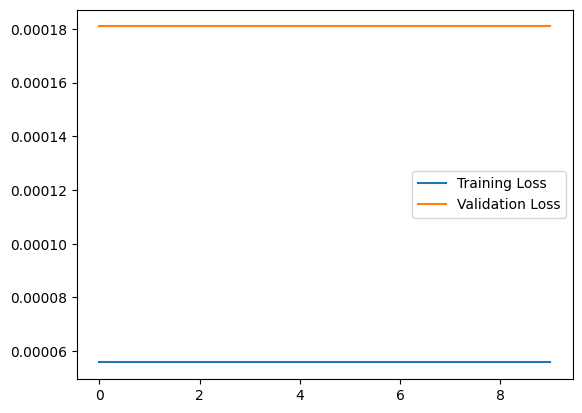

In [9]:
# 학습 결과 시각화
plt.plot(range(epochs), [loss.item() for _ in range(epochs)], label='Training Loss')  # 학습 손실 시각화
plt.plot(range(epochs), [val_loss.item() for _ in range(epochs)], label='Validation Loss')  # 검증 손실 시각화
plt.legend()  # 범례 추가
plt.show()  # 그래프 출력

In [10]:
import plotly.graph_objects as go

# 예측 결과 시각화
model.eval() # 모델을 평가 모드로 전환
with torch.no_grad(): # 그래디언트 계산 비활성화
    # 검증 데이터에 대한 예측 수행
    y_pred = model(X_val).cpu().numpy() # 예측값을 CPU로 이동하여 NumPy 배열로 변환
    y_val = y_val.cpu().numpy() # 실제값을 CPU로 이동하여 NumPy 배열로 변환
    y_pred = scaler.inverse_transform(y_pred) # 예측값을 원래 스케일로 변환
    y_val = scaler.inverse_transform(y_val) # 실제값을 원래 스케일로 변환
    # 실제 값 및 예측 값 시각화
    # 각 포인트별 로스 계산 (예: 절대 오차)
    print(y_val.shape, y_pred.shape)    
    # 예시 데이터 (실제 y_val, 예측 y_pred, 그리고 loss 계산)

    loss = np.abs(y_val - y_pred)

    # x축 값 (인덱스)
    x = np.arange(len(y_val))


(14014, 1) (14014, 1)


In [11]:

# Plotly 그래프 생성
fig = go.Figure()
print(f"y_val: {y_val.shape}, y_pred: {y_pred.shape}, loss: {loss.shape}")
y_val = y_val.ravel()  # 또는 y_val.flatten()
y_pred = y_pred.ravel()
loss = loss.ravel()
print(f"y_val: {y_val.shape}, y_pred: {y_pred.shape}, loss: {loss.shape}")
# 실제 값 라인
fig.add_trace(go.Scatter(
    x=x, y=y_val, mode='lines+markers', name='True Value',
    line=dict(width=2), marker=dict(size=8),
    customdata=np.stack((y_pred, loss), axis=-1),
    hovertemplate='Index: %{x}<br>True: %{y}<br>Predicted: %{customdata[0]}<br>Loss: %{customdata[1]}'
))

# 예측 값 라인
fig.add_trace(go.Scatter(
    x=x, y=y_pred, mode='lines+markers', name='Predicted Value',
    line=dict(width=2), marker=dict(size=8),
    customdata=np.stack((y_val, loss), axis=-1),
    hovertemplate='Index: %{x}<br>Predicted: %{y}<br>True: %{customdata[0]}<br>Loss: %{customdata[1]}'
))

# 레이아웃 설정
fig.update_layout(
    title='True vs Predicted Values with Loss',
    xaxis_title='Index',
    yaxis_title='Value',
    hovermode='closest'
)

fig.show()

y_val: (14014, 1), y_pred: (14014, 1), loss: (14014, 1)
y_val: (14014,), y_pred: (14014,), loss: (14014,)


In [12]:
# 모델 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
mse = mean_squared_error(y_val, y_pred) # MSE 계산
mae = mean_absolute_error(y_val, y_pred) # MAE 계산
rmse = sqrt(mse) # RMSE 계산
smape = np.mean(np.abs((y_val - y_pred) / (y_val + y_pred))) * 100 # SMAPE 계산
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, SMAPE: {smape:.4f}%") # RMSE, MAE, SMAPE 출력 

RMSE: 0.8074, MAE: 0.5885, SMAPE: 10.6800%


In [13]:
# 모델 저장
torch.save(model.state_dict(), 'lstm_model.pth')